#Setup

In [1]:
#Change to your path
path = 'data'

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


##Import package and set defaults

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd


In [5]:
from shapely.geometry import MultiPoint,Point



In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)



##Geospatial shared resources

In [7]:
point_zero = MultiPoint([Point(0, 0)])


In [8]:
def change_crs(df, crs=3347):
  print("Valid rows before crs change:",len(df[df.geometry.is_valid]))
  df.geometry = df.geometry.to_crs(epsg=crs)
  print("Valid rows after crs change:",len(df[df.geometry.is_valid]))
  return df



#Clean data

## Public parks

Importing and cleaning Parks dataset
  
*   Change to Candedian crs - 3347
*   Calculate park area in m^2
*   For each park, based on size assign one: Parkette, Neighbourhood, Community, District, City-wide



In [116]:
name = 'Green Spaces.geojson'
green = gpd.read_file(f"{path}/{name}")
green.head()


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,1,1,0,890.00,OTHER_CEMETERY,None,4009,ARMADALE FREE METHODIST CEMETERY,ARMADALE FREE METHODIST CEMETERY,1.00,"MULTIPOLYGON (((-79.25752 43.82953, -79.25739 ..."
1,2,2,2,0,890.00,OTHER_CEMETERY,None,4010,HILLSIDE CEMETERY,HILLSIDE CEMETERY,2.00,"MULTIPOLYGON (((-79.18962 43.82488, -79.18949 ..."
2,3,3,3,0,890.00,OTHER_CEMETERY,None,4011,HIGHLAND MEMORY GARDENS,HIGHLAND MEMORY GARDENS,3.00,"MULTIPOLYGON (((-79.34758 43.8081, -79.34758 4..."
3,4,4,4,0,890.00,OTHER_CEMETERY,None,4005,CHRISTIE'S METHODIST CEMETERY,CHRISTIE'S METHODIST CEMETERY,4.00,"MULTIPOLYGON (((-79.31835 43.79902, -79.31851 ..."
4,5,5,5,0,890.00,OTHER_CEMETERY,None,4012,ST. PAUL'S ANGLICAN CHURCH CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,5.00,"MULTIPOLYGON (((-79.31649 43.7964, -79.3165 43..."


In [117]:
#Chancg crs to Canedian one, make sure we are not losing datapoints
green = change_crs(green)
green['area'] = green.geometry.area


Valid rows before crs change: 3304
Valid rows after crs change: 3304


In [118]:
# Rows which do not add information
# We have no visibility into their meaning
to_remove = ['AREA_ATTR_ID','PARENT_AREA_ID',
             'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'OBJECTID',
             '_id']

green.drop(columns=to_remove,inplace=True)
green.head()

,AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_NAME,AREA_DESC,geometry,area
0,1,890.00,OTHER_CEMETERY,ARMADALE FREE METHODIST CEMETERY,ARMADALE FREE METHODIST CEMETERY,"MULTIPOLYGON (((7231050.523 950397.528, 723106...",1280.55
1,2,890.00,OTHER_CEMETERY,HILLSIDE CEMETERY,HILLSIDE CEMETERY,"MULTIPOLYGON (((7236633.432 950982.639, 723665...",1589.62
2,3,890.00,OTHER_CEMETERY,HIGHLAND MEMORY GARDENS,HIGHLAND MEMORY GARDENS,"MULTIPOLYGON (((7224258.035 946553.917, 722425...",189355.68
3,4,890.00,OTHER_CEMETERY,CHRISTIE'S METHODIST CEMETERY,CHRISTIE'S METHODIST CEMETERY,"MULTIPOLYGON (((7226821.034 946012.588, 722680...",1311.79
4,5,890.00,OTHER_CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,"MULTIPOLYGON (((7227029.816 945750.439, 722702...",4209.51


In [119]:
green.groupby(['AREA_CLASS'])['area'].sum().sort_values(ascending=False)

,area
AREA_CLASS,
Park,84390513.32
OTHER_HYDRO,8712110.63
OTHER_GOLFCOURSE,7825091.38
OTHER_CITY,6386199.01
OTHER_CEMETERY,5162145.36
OTHER_TRCA,3874237.01
OTHER_PROVINCIAL_FEDERAL,3380964.81
Building Grounds,3310391.22
Golf Course,1982339.67


In [120]:
# We are not interested in cemeteries and golf courses.
# Leaving only 'real' public space
parks = green[green['AREA_CLASS'].isin(['Park','OTHER_CITY'])].copy()
parks.head()

,AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_NAME,AREA_DESC,geometry,area
64,74,891.00,OTHER_CITY,ROUGE PARK,ROUGE PARK,"MULTIPOLYGON (((7235347.354 953359.303, 723525...",1.01
65,75,891.00,OTHER_CITY,ROUGE PARK,ROUGE PARK,"MULTIPOLYGON (((7235022.971 953272.387, 723506...",2092.34
66,76,891.00,OTHER_CITY,CITY WIDE OPEN SPACE,CITY WIDE OPEN SPACE,"MULTIPOLYGON (((7231647.545 951307.393, 723177...",37741.74
67,77,891.00,OTHER_CITY,CITY WIDE OPEN SPACE,CITY WIDE OPEN SPACE,"MULTIPOLYGON (((7231558.091 951133.616, 723157...",19678.94
68,79,891.00,OTHER_CITY,ROUGE RIVER WATERCOURSE,ROUGE RIVER WATERCOURSE,"MULTIPOLYGON (((7232780.391 951255.32, 7232898...",18932.86


In [121]:
bins = [0, 5000, 30000, 50000, 150000, np.inf]
names = ['Parkette', 'Neighbourhood', 'Community', 'District', 'City-wide']


parks['PARK_TYPE'] =  pd.cut(parks['area'], bins, labels=names)
parks['PARK_TYPE'] = parks['PARK_TYPE'].cat.add_categories('Open Space')

parks.loc[parks['AREA_CLASS'] == 'OTHER_CITY', 'PARK_TYPE'] = 'Open Space'
parks['PARK_TYPE'].value_counts()

,count
PARK_TYPE,
Open Space,678
Parkette,617
Neighbourhood,579
District,159
Community,158
City-wide,90


In [122]:
parks.groupby(['PARK_TYPE'])['area'].sum().sort_values(ascending=False)

<ipython-input-122-eaf6ff515950>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parks.groupby(['PARK_TYPE'])['area'].sum().sort_values(ascending=False)


,area
PARK_TYPE,
City-wide,55208734.13
District,13299772.46
Neighbourhood,8546047.99
Open Space,6386199.01
Community,6141201.07
Parkette,1194757.67


In [123]:
def find_closest_park(crime_point,df):
    distances = df.geometry.distance(crime_point)
    min_distance_idx = distances.idxmin()
    closest_park_name = df.loc[min_distance_idx, 'AREA_NAME']
    closest_park_type = df.loc[min_distance_idx, 'PARK_TYPE']

    closest_park_distance = distances[min_distance_idx]
    closest_park_category = 'Distant'

    if closest_park_distance < 50:
      closest_park_category = 'In Park'
    elif closest_park_distance < 200:
      closest_park_category = 'Near Park'
    return min_distance_idx,closest_park_name, closest_park_distance,closest_park_category,closest_park_type



In [124]:
def update_df_with_park_data(df):
  df[['closest_park_index','closest_park_name', 'closest_park_distance','closest_park_category','closest_park_type']] = \
  df['geometry'].apply(lambda crime_point: find_closest_park(crime_point,parks)).apply(pd.Series)
  return df


In [125]:
parks.to_file(f"{path}/parks.json", driver="GeoJSON")


## Neighbourhoods

Importing and cleaning Neighbourhoods dataset
  
*   Change to Candedian crs - 3347
*   Calculate neighbourhood area in m^2
*   For each neighbourhood calculate 3 park measures:
  * parks area in neighbourhood
  * percent of neighbourhood area which is a part
  * count number of parks

In [134]:
name = "Neighbourhoods.geojson"
Neighbourhoods = gpd.read_file(f"{path}/{name}")
Neighbourhoods.head()


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,OBJECTID,geometry
0,1,2502366,26022881,0,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.00,"MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ..."
1,2,2502365,26022880,0,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.00,"MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ..."
2,3,2502364,26022879,0,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.00,"MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ..."
3,4,2502363,26022878,0,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,NA,17824785.00,"MULTIPOLYGON (((-79.4387 43.66766, -79.43841 4..."
4,5,2502362,26022877,0,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,NA,17824801.00,"MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ..."


In [135]:
#Chancg crs to Canedian one, make sure we are not losing datapoints
Neighbourhoods = change_crs(Neighbourhoods)


Valid rows before crs change: 158
Valid rows after crs change: 158


<Axes: >

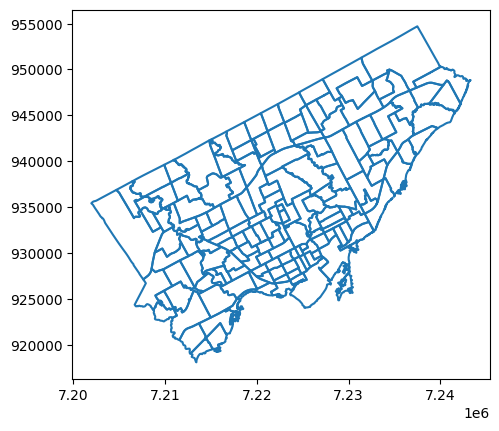

In [21]:
Neighbourhoods.boundary.plot()

In [23]:
# Intersect parks and Neighbourhoods to find overlapping areas
parks_in_Neighbourhoods = gpd.overlay(parks, Neighbourhoods, how='intersection')

# Calculate park area in each Neighbourhoods
parks_in_Neighbourhoods['park_area'] = parks_in_Neighbourhoods.geometry.area
parks_in_Neighbourhoods

# 1 Sum park areas by neighborhood
park_density = parks_in_Neighbourhoods.groupby('AREA_LONG_CODE')['park_area'].sum().reset_index()
# Merge back with Neighbourhoods and calculate percentage
Neighbourhoods['neighborhood_area'] = Neighbourhoods.geometry.area
Neighbourhoods = Neighbourhoods.merge(park_density, on='AREA_LONG_CODE', how='left').fillna(0)
Neighbourhoods['park_density'] = (Neighbourhoods['park_area'] / Neighbourhoods['neighborhood_area']) * 100

# 1 count number of parks by neighborhood
park_count = parks_in_Neighbourhoods.groupby('AREA_LONG_CODE')['park_area'].count().reset_index()
Neighbourhoods = Neighbourhoods.merge(park_count.rename(columns={'park_area':'park_count'}), on='AREA_LONG_CODE', how='left').fillna(0)
Neighbourhoods.head()



<ipython-input-23-8366423008b2>:2: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  parks_in_Neighbourhoods = gpd.overlay(parks, Neighbourhoods, how='intersection')


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,OBJECTID,geometry,neighborhood_area,park_area,park_density,park_count
0,1,2502366,26022881,0,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.00,"MULTIPOLYGON (((7223572.121 933629.028, 722358...",990443.84,45225.38,4.57,6
1,2,2502365,26022880,0,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.00,"MULTIPOLYGON (((7222472.993 934466.003, 722240...",421637.46,3646.16,0.86,3
2,3,2502364,26022879,0,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.00,"MULTIPOLYGON (((7220537.813 928655.657, 722044...",1577029.79,123485.25,7.83,6
3,4,2502363,26022878,0,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,NA,17824785.00,"MULTIPOLYGON (((7220000.072 929420.975, 722003...",2332390.34,137375.17,5.89,21
4,5,2502362,26022877,0,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,NA,17824801.00,"MULTIPOLYGON (((7224932.155 927766.412, 722485...",1173955.57,19191.37,1.63,3


In [24]:
Neighbourhoods['park_density'].describe()

,park_density
count,158.00
mean,10.84
std,8.52
min,0.18
25%,4.59
50%,7.93
75%,15.04
max,48.46


In [25]:
Neighbourhoods.rename(columns={'AREA_LONG_CODE':'neighbourhood_id','AREA_NAME':'neighbourhood_name'},inplace=True)
Neighbourhoods.drop(columns=['AREA_ID','AREA_ATTR_ID','PARENT_AREA_ID','AREA_SHORT_CODE','AREA_DESC','OBJECTID'],inplace=True)
Neighbourhoods.head()

,_id,neighbourhood_id,neighbourhood_name,CLASSIFICATION,CLASSIFICATION_CODE,geometry,neighborhood_area,park_area,park_density,park_count
0,1,174,South Eglinton-Davisville,Not an NIA or Emerging Neighbourhood,NA,"MULTIPOLYGON (((7223572.121 933629.028, 722358...",990443.84,45225.38,4.57,6
1,2,173,North Toronto,Not an NIA or Emerging Neighbourhood,NA,"MULTIPOLYGON (((7222472.993 934466.003, 722240...",421637.46,3646.16,0.86,3
2,3,172,Dovercourt Village,Not an NIA or Emerging Neighbourhood,NA,"MULTIPOLYGON (((7220537.813 928655.657, 722044...",1577029.79,123485.25,7.83,6
3,4,171,Junction-Wallace Emerson,Not an NIA or Emerging Neighbourhood,NA,"MULTIPOLYGON (((7220000.072 929420.975, 722003...",2332390.34,137375.17,5.89,21
4,5,170,Yonge-Bay Corridor,Not an NIA or Emerging Neighbourhood,NA,"MULTIPOLYGON (((7224932.155 927766.412, 722485...",1173955.57,19191.37,1.63,3


In [26]:
neighbourhoods_with_park = pd.DataFrame(Neighbourhoods)
neighbourhoods_with_park.to_csv(f'{path}/neighbourhoods_with_park.csv')

In [27]:
Neighbourhoods.to_file(f"{path}/neighbourhoods_with_park.json", driver="GeoJSON")


##Theft data


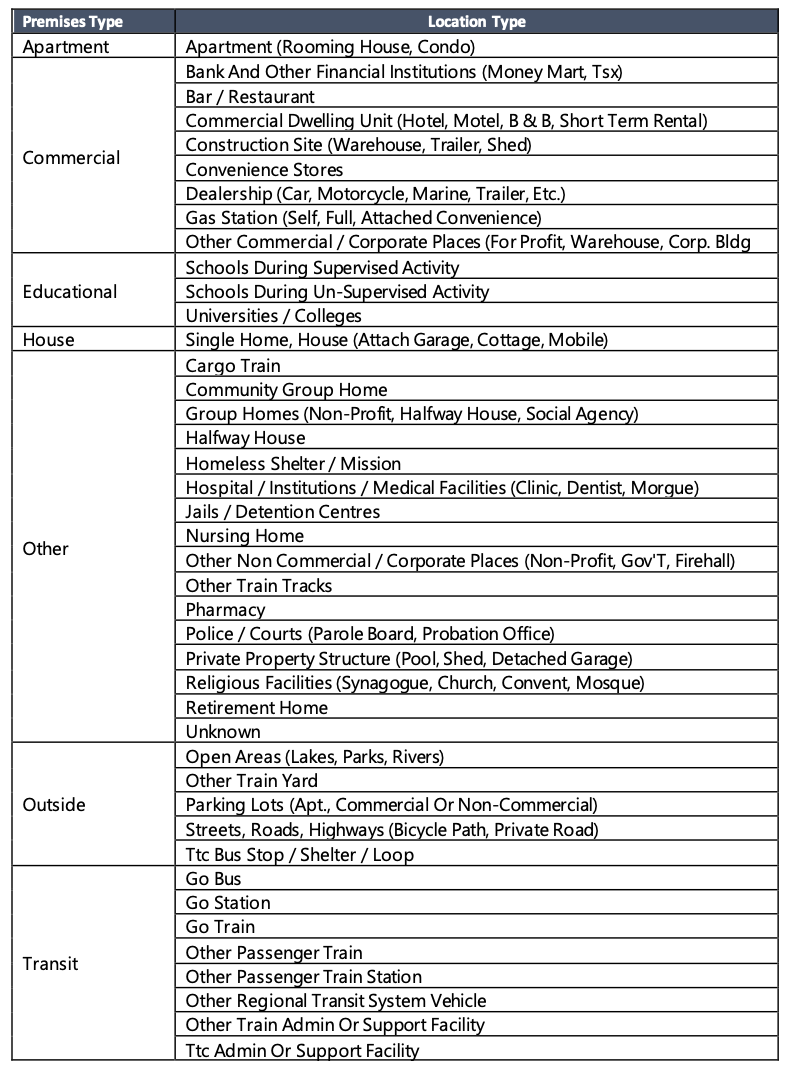

### Car theft
Importing and cleaning car dataset
  
*   Removes thefts with missing geospatial data - at location (0.0)
*   Change to Candedian crs - 3347
*   Remove theft data prior to 1.1.2024
*   Analyze and drop duplicates
*   Review columns, removing unneeded ones (e.g. date the crime was reported)
*   Keeping only crimes which happened outside
*


In [ ]:
name = "theft-from-motor-vehicle.geojson"
car = gpd.read_file(f"{path}/{name}")
car


,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,geometry
0,1,GO-20141261604,2014-01-01,2013-12-31,2014.00,January,1.00,1.00,Wednesday,9.00,2013.00,December,31.00,365.00,Tuesday,16.00,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,164,MULTIPOINT (-79.39923 43.64246)
1,2,GO-20141262668,2014-01-01,2013-12-31,2014.00,January,1.00,1.00,Wednesday,14.00,2013.00,December,31.00,365.00,Tuesday,18.00,D31,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,154,MULTIPOINT (-79.49411 43.72396)
2,3,GO-20141262199,2014-01-01,2013-12-31,2014.00,January,1.00,1.00,Wednesday,16.00,2013.00,December,31.00,365.00,Tuesday,17.00,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,165,MULTIPOINT (-79.39883 43.64142)
3,4,GO-20141263153,2014-01-01,2014-01-01,2014.00,January,1.00,1.00,Wednesday,21.00,2014.00,January,1.00,1.00,Wednesday,1.00,D23,"Single Home, House (Attach Garage, Cottage, Mo...",House,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,007,MULTIPOINT (-79.56601 43.69081)
4,5,GO-20141261988,2014-01-01,2013-12-31,2014.00,January,1.00,1.00,Wednesday,11.00,2013.00,December,31.00,365.00,Tuesday,21.00,D51,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,168,MULTIPOINT (-79.37655 43.66205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94246,94247,GO-20249033999,2024-06-30,2024-06-29,2024.00,June,30.00,182.00,Sunday,9.00,2024.00,June,29.00,181.00,Saturday,14.00,D22,Other Commercial / Corporate Places (For Profi...,Commercial,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,159,MULTIPOINT (-79.55374 43.61951)
94247,94248,GO-20241426753,2024-06-30,2024-06-28,2024.00,June,30.00,182.00,Sunday,15.00,2024.00,June,28.00,180.00,Friday,18.00,D43,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,139,MULTIPOINT (-79.22467 43.74067)
94248,94249,GO-20241422771,2024-06-30,2024-06-30,2024.00,June,30.00,182.00,Sunday,1.00,2024.00,June,30.00,182.00,Sunday,1.00,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,162,MULTIPOINT (-79.4032 43.64519)
94249,94250,GO-20241424707,2024-06-30,2024-06-30,2024.00,June,30.00,182.00,Sunday,11.00,2024.00,June,30.00,182.00,Sunday,4.00,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142.00,200.00,Theft From Motor Vehicle Under,NonMCI,084,MULTIPOINT (-79.42283 43.64125)


In [ ]:
# Remove rows with missing geospacial data
car = car[car['geometry'] != point_zero]

In [ ]:
#Chancg crs to Canedian one, make sure we are not losing datapoints
car = change_crs(car)


Valid rows before crs change: 93140
Valid rows after crs change: 93140


In [ ]:
# Check what is the minmum and maximum data in which crime occurred
print("car theft min date:", car.OCC_DATE.min())
print("car theft max date:", car.OCC_DATE.max())

#Remove crime before 1.1.2014
car = car[car['OCC_DATE']>='2014-01-01']
print("Updated min car theft max date:", car.OCC_DATE.min())


car theft min date: 1963-03-15 00:00:00
car theft max date: 2024-06-30 00:00:00
Updated min car theft max date: 2014-01-01 00:00:00


In [ ]:
# Drop duplicates
car = car.drop_duplicates(keep='first')

# If there are still duplicates, understand why
# In our case - because they are different offence
repeated_values = car['EVENT_UNIQUE_ID'].value_counts()
repeated_values = repeated_values[repeated_values > 1].index.tolist()

print(len(repeated_values))
for v in repeated_values[0:5]:
  print(v)
  print(car[car['EVENT_UNIQUE_ID']==v])
  print("-----------")

# Data with similar EVENT_UNIQUE_ID differ only in OFFENCE, so we can drop duplicates
car = car.drop_duplicates(subset='EVENT_UNIQUE_ID', keep='first')

49
GO-20191525879
         _id EVENT_UNIQUE_ID REPORT_DATE   OCC_DATE  REPORT_YEAR REPORT_MONTH  \
49535  49536  GO-20191525879  2019-08-12 2019-08-11      2019.00       August   
49536  49537  GO-20191525879  2019-08-12 2019-08-11      2019.00       August   
49537  49538  GO-20191525879  2019-08-12 2019-08-11      2019.00       August   
49539  49540  GO-20191525879  2019-08-12 2019-08-11      2019.00       August   
49540  49541  GO-20191525879  2019-08-12 2019-08-11      2019.00       August   
49546  49547  GO-20191525879  2019-08-12 2019-08-11      2019.00       August   

       REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  OCC_YEAR OCC_MONTH  \
49535       12.00      224.00  Monday            10.00   2019.00    August   
49536       12.00      224.00  Monday            10.00   2019.00    August   
49537       12.00      224.00  Monday            10.00   2019.00    August   
49539       12.00      224.00  Monday            10.00   2019.00    August   
49540       12.00      2

In [ ]:
#All these rows hold the same data, will keep only offence
print(car['OFFENCE'].value_counts())
print(car['MCI_CATEGORY'].value_counts())
print(car['UCR_CODE'].value_counts())
print(car['UCR_EXT'].value_counts())

# Not interested in report date,
# mci category and user code is the same as offence
# UCR_EXT has one value
to_remove = ['REPORT_DATE',  'REPORT_YEAR','REPORT_MONTH',
             'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
             'UCR_CODE', 'UCR_EXT',
             'MCI_CATEGORY',"_id"]

car.drop(columns=to_remove,inplace=True)
car.head()

OFFENCE
Theft From Motor Vehicle Under    89637
Theft From Motor Vehicle Over      3221
Name: count, dtype: int64
MCI_CATEGORY
NonMCI        89637
Theft Over     3221
Name: count, dtype: int64
UCR_CODE
2142.00    89637
2132.00     3221
Name: count, dtype: int64
UCR_EXT
200.00    92858
Name: count, dtype: int64


<ipython-input-32-0a153417be9f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.drop(columns=to_remove,inplace=True)


,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,HOOD_158,geometry
3,GO-20141263153,2014-01-01,2014.00,January,1.00,1.00,Wednesday,1.00,D23,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,007,MULTIPOINT (7209176.603 929975.035)
6,GO-20141263347,2014-01-01,2014.00,January,1.00,1.00,Wednesday,11.00,D42,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,130,MULTIPOINT (7229738.451 948717.015)
12,GO-20149000047,2014-01-01,2014.00,January,1.00,1.00,Wednesday,1.00,D23,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,004,MULTIPOINT (7208667.919 933190.436)
15,GO-20141263029,2014-01-01,2014.00,January,1.00,1.00,Wednesday,15.00,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,161,MULTIPOINT (7217540.389 923750.421)
16,GO-20141260616,2014-01-01,2014.00,January,1.00,1.00,Wednesday,2.00,D53,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft From Motor Vehicle Under,056,MULTIPOINT (7224910.898 933481.823)


In [ ]:
# What permise types are available.
# House and apartment are not relevant
car['PREMISES_TYPE'].value_counts()

,count
PREMISES_TYPE,
Outside,51642
House,21732
Other,6970
Apartment,6968
Commercial,4864
Educational,481
Transit,201


In [ ]:
# What about Other, Educational, Commercial, Transit?
print('PREMISES_TYPE is Other')
print(car[car['PREMISES_TYPE']=='Other']['LOCATION_TYPE'].value_counts())
print("------------------------------------------------------")

print('PREMISES_TYPE is Educational')
print(car[car['PREMISES_TYPE']=='Educational']['LOCATION_TYPE'].value_counts())
print("------------------------------------------------------")

print('PREMISES_TYPE is Commercial')
print(car[car['PREMISES_TYPE']=='Commercial']['LOCATION_TYPE'].value_counts())
print("------------------------------------------------------")

print('PREMISES_TYPE is Transit')
print(car[car['PREMISES_TYPE']=='Transit']['LOCATION_TYPE'].value_counts())

PREMISES_TYPE is Other
LOCATION_TYPE
Private Property Structure (Pool, Shed, Detached Garage)                  5659
Unknown                                                                    627
Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)      234
Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)     140
Religious Facilities (Synagogue, Church, Convent, Mosque)                  115
Group Homes (Non-Profit, Halfway House, Social Agency)                      84
Police / Courts (Parole Board, Probation Office)                            36
Retirement Home                                                             24
Homeless Shelter / Mission                                                  23
Group Homes (Non-Profit, Halfway House,                                     12
Nursing Home                                                                10
Pharmacy                                                                     3
Community Group

In [ ]:
outside = ['Outside','Commercial','Educational','Transit']
car = car[car['PREMISES_TYPE'].isin(outside)]
car['PREMISES_TYPE'].value_counts()

,count
PREMISES_TYPE,
Outside,51642
Commercial,4864
Educational,481
Transit,201


In [ ]:
car['LOCATION_TYPE'].value_counts()


,count
LOCATION_TYPE,
"Parking Lots (Apt., Commercial Or Non-Commercial)",36325
"Streets, Roads, Highways (Bicycle Path, Private Road)",15044
"Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg",3055
"Dealership (Car, Motorcycle, Marine, Trailer, Etc.)",531
"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",388
Bar / Restaurant,378
Schools During Un-Supervised Activity,312
"Open Areas (Lakes, Parks, Rivers)",269
"Gas Station (Self, Full, Attached Convenience)",198


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


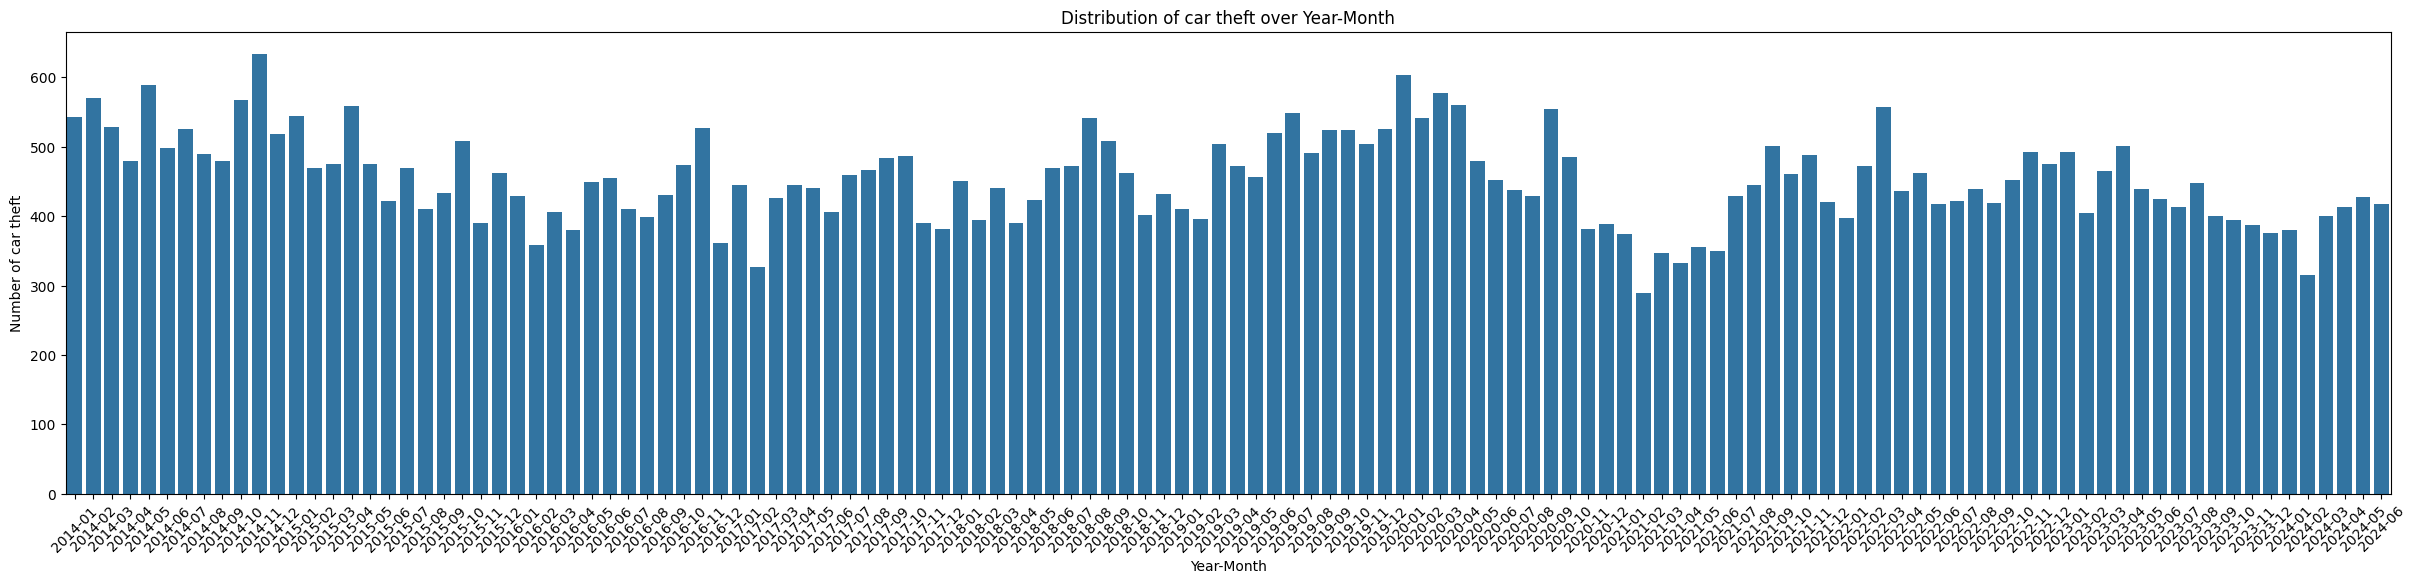

In [ ]:
car['year_month'] = car['OCC_DATE'].dt.to_period('M')  # Creates 'YYYY-MM' format


plt.figure(figsize=(30, 6))
sns.countplot(data=car, x='year_month')

plt.xlabel("Year-Month")
plt.ylabel("Number of car theft")
plt.title("Distribution of car theft over Year-Month")
plt.xticks(rotation=45)
plt.show()


In [ ]:
car = gpd.sjoin(car, Neighbourhoods, how="left", predicate="within")
car.head()

,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,HOOD_158,geometry,year_month,index_right,_id,neighbourhood_id,neighbourhood_name,CLASSIFICATION,CLASSIFICATION_CODE,neighborhood_area,park_area,park_density,park_count
15,GO-20141263029,2014-01-01,2014.00,January,1.00,1.00,Wednesday,15.00,D22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,161,MULTIPOINT (7217540.389 923750.421),2014-01,44.00,45.00,161,Humber Bay Shores,Not an NIA or Emerging Neighbourhood,NA,1656622.57,456033.16,27.53,15.00
17,GO-20141261694,2014-01-01,2014.00,January,1.00,1.00,Wednesday,1.00,D51,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Theft From Motor Vehicle Under,166,MULTIPOINT (7225614.616 928062.742),2014-01,39.00,40.00,166,St Lawrence-East Bayfront-The Islands,Not an NIA or Emerging Neighbourhood,NA,11875224.03,2792382.24,23.51,53.00
19,GO-20149000046,2014-01-01,2014.00,January,1.00,1.00,Wednesday,0.00,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft From Motor Vehicle Under,078,MULTIPOINT (7223387.097 928306.715),2014-01,80.00,81.00,078,Kensington-Chinatown,Not an NIA or Emerging Neighbourhood,NA,1610389.49,59567.09,3.70,10.00
20,GO-20149000033,2014-01-01,2014.00,January,1.00,1.00,Wednesday,3.00,D14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,081,MULTIPOINT (7221907.242 928266.306),2014-01,105.00,106.00,081,Trinity-Bellwoods,Not an NIA or Emerging Neighbourhood,NA,1815085.68,188258.20,10.37,8.00
22,GO-20141262977,2014-01-01,2014.00,January,1.00,1.00,Wednesday,14.00,D11,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft From Motor Vehicle Under,085,MULTIPOINT (7218532.189 925500.512),2014-01,102.00,103.00,085,South Parkdale,Neighbourhood Improvement Area,NIA,2400398.26,504977.86,21.04,29.00


In [ ]:
car.OCC_YEAR.value_counts().reset_index().sort_values(by='OCC_YEAR')

,OCC_YEAR,count
0,2014.00,6424
3,2015.00,5620
8,2016.00,5082
6,2017.00,5161
5,2018.00,5385
2,2019.00,5880
1,2020.00,5892
9,2021.00,4797
4,2022.00,5443
7,2023.00,5147


In [ ]:
car_df = pd.DataFrame(car)
car_df.to_csv(f'{path}/car_with_neighborhood.csv')

###Bike theft

Importing and cleaning bike dataset
  
*   Removes thefts with missing geospatial data - at location (0.0)
*   Change to Candedian crs - 3347
*   Remove theft data prior to 1.1.2024
*   Remove rows of primary offence 'PROPERTY - FOUND' as these are not stolen bikes
*   Analyzedh rows with duplicates EVENT_UNIQUE_ID. Choose not to drop them as each is seperate bike stolen
*   Review columns, removing unneeded ones (e.g. date the crime was reported)
*   Keeping only crimes which happened outside



In [74]:
name = 'bicycle-thefts.geojson'
bike = gpd.read_file(f"{path}/{name}")
bike.head()

,_id,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,geometry
0,1,GO-20141261431,THEFT UNDER,2014-01-01,2014.00,January,Wednesday,1.00,1.00,7.00,2014-01-01,2014.00,January,Wednesday,1.00,1.00,7.00,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,None,MT,10.00,None,0.00,STOLEN,MULTIPOINT (-79.44365 43.63766)
1,2,GO-20141263784,PROPERTY - FOUND,2014-01-01,2014.00,January,Wednesday,1.00,1.00,18.00,2014-01-01,2014.00,January,Wednesday,1.00,1.00,18.00,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.00,BLK,0.00,RECOVERED,MULTIPOINT (-79.41465 43.66052)
2,3,GO-20141263544,B&E,2013-12-26,2013.00,December,Thursday,26.00,360.00,19.00,2014-01-01,2014.00,January,Wednesday,1.00,1.00,17.00,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.00,SILRED,1300.00,STOLEN,MULTIPOINT (-79.39564 43.64002)
3,4,GO-20141266048,THEFT UNDER,2013-12-30,2013.00,December,Monday,30.00,364.00,17.00,2014-01-02,2014.00,January,Thursday,2.00,2.00,8.00,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.00,WHI,500.00,STOLEN,MULTIPOINT (-79.42957 43.71842)
4,5,GO-20141267465,THEFT UNDER,2013-09-30,2013.00,September,Monday,30.00,273.00,0.00,2014-01-02,2014.00,January,Thursday,2.00,2.00,12.00,D14,"Apartment (Rooming House, Condo)",Apartment,NORCO,CHARGER 9.2,MT,21.00,BLK,750.00,STOLEN,MULTIPOINT (-79.40468 43.64896)


In [75]:
print(len(bike))
bike = bike[bike['geometry'] != point_zero]
print(len(bike))


36125
35795


In [76]:
#Chancg crs to Canedian one, make sure we are not losing datapoints
bike = change_crs(bike)


Valid rows before crs change: 35795
Valid rows after crs change: 35795


In [45]:
print("bike theft min date:", bike.OCC_DATE.min())
print("bike theft max date:", bike.OCC_DATE.max())

#Remove crime before 1.1.2014
bike = bike[bike['OCC_DATE']>='2014-01-01']
print(len(bike))
print("Updated min bike theft max date:", bike.OCC_DATE.min())


bike theft min date: 1975-08-16 00:00:00
bike theft max date: 2024-06-30 00:00:00
35738
Updated min bike theft max date: 2014-01-01 00:00:00


In [77]:
bike['PRIMARY_OFFENCE'].value_counts().head(10)

,count
PRIMARY_OFFENCE,
THEFT UNDER,15935
THEFT UNDER - BICYCLE,14083
B&E,2375
THEFT OF EBIKE UNDER $5000,1237
PROPERTY - FOUND,411
THEFT FROM MOTOR VEHICLE UNDER,323
B&E W'INTENT,282
THEFT OVER - BICYCLE,183
THEFT OVER,176


In [79]:
bike['STATUS'].value_counts()

,count
STATUS,
STOLEN,34834
UNKNOWN,587
RECOVERED,374


In [80]:
bike = bike[bike['PRIMARY_OFFENCE']!='PROPERTY - FOUND']
bike = bike[bike['STATUS']!='RECOVERED']

print(len(bike))

35050


In [87]:
# Not interested in report date,
# mci category and user code is the same as offence
# UCR_EXT has one value
to_remove = ['REPORT_DATE',  'REPORT_YEAR','REPORT_MONTH',
             'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
             '_id']

bike.drop(columns=to_remove,inplace=True)
bike.head()

,EVENT_UNIQUE_ID,OCC_DATE,OCC_DOW,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,geometry
0,GO-20141261431,2014-01-01,Wednesday,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,None,MT,10.00,None,0.00,STOLEN,MULTIPOINT (7220261.991 925992.388)
2,GO-20141263544,2013-12-26,Thursday,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.00,SILRED,1300.00,STOLEN,MULTIPOINT (7224101.324 927027.644)
3,GO-20141266048,2013-12-30,Monday,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.00,WHI,500.00,STOLEN,MULTIPOINT (7219618.065 935232.92)
4,GO-20141267465,2013-09-30,Monday,D14,"Apartment (Rooming House, Condo)",Apartment,NORCO,CHARGER 9.2,MT,21.00,BLK,750.00,STOLEN,MULTIPOINT (7223170.801 927880.467)
5,GO-20149000074,2013-12-25,Wednesday,D51,"Apartment (Rooming House, Condo)",Apartment,CA,RZ 120 1,MT,21.00,WHI,1500.00,STOLEN,MULTIPOINT (7225687.457 928776.559)


In [96]:
bike = bike.drop_duplicates(keep='first')

# If there are still duplicates, understand why
# In our case - because they are different offence
repeated_values = bike['EVENT_UNIQUE_ID'].value_counts()
repeated_values = repeated_values[repeated_values > 1].index.tolist()

print(len(repeated_values))
for v in repeated_values[3080:3085]:
  print(v)
  print(bike[bike['EVENT_UNIQUE_ID']==v])
  print("-----------:")

845


In [91]:
outside = ['Outside','Commercial','Educational','Transit']
bike = bike[bike['PREMISES_TYPE'].isin(outside)]
bike['PREMISES_TYPE'].value_counts()

,count
PREMISES_TYPE,
Outside,10286
Commercial,4136
Educational,1536
Transit,754


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


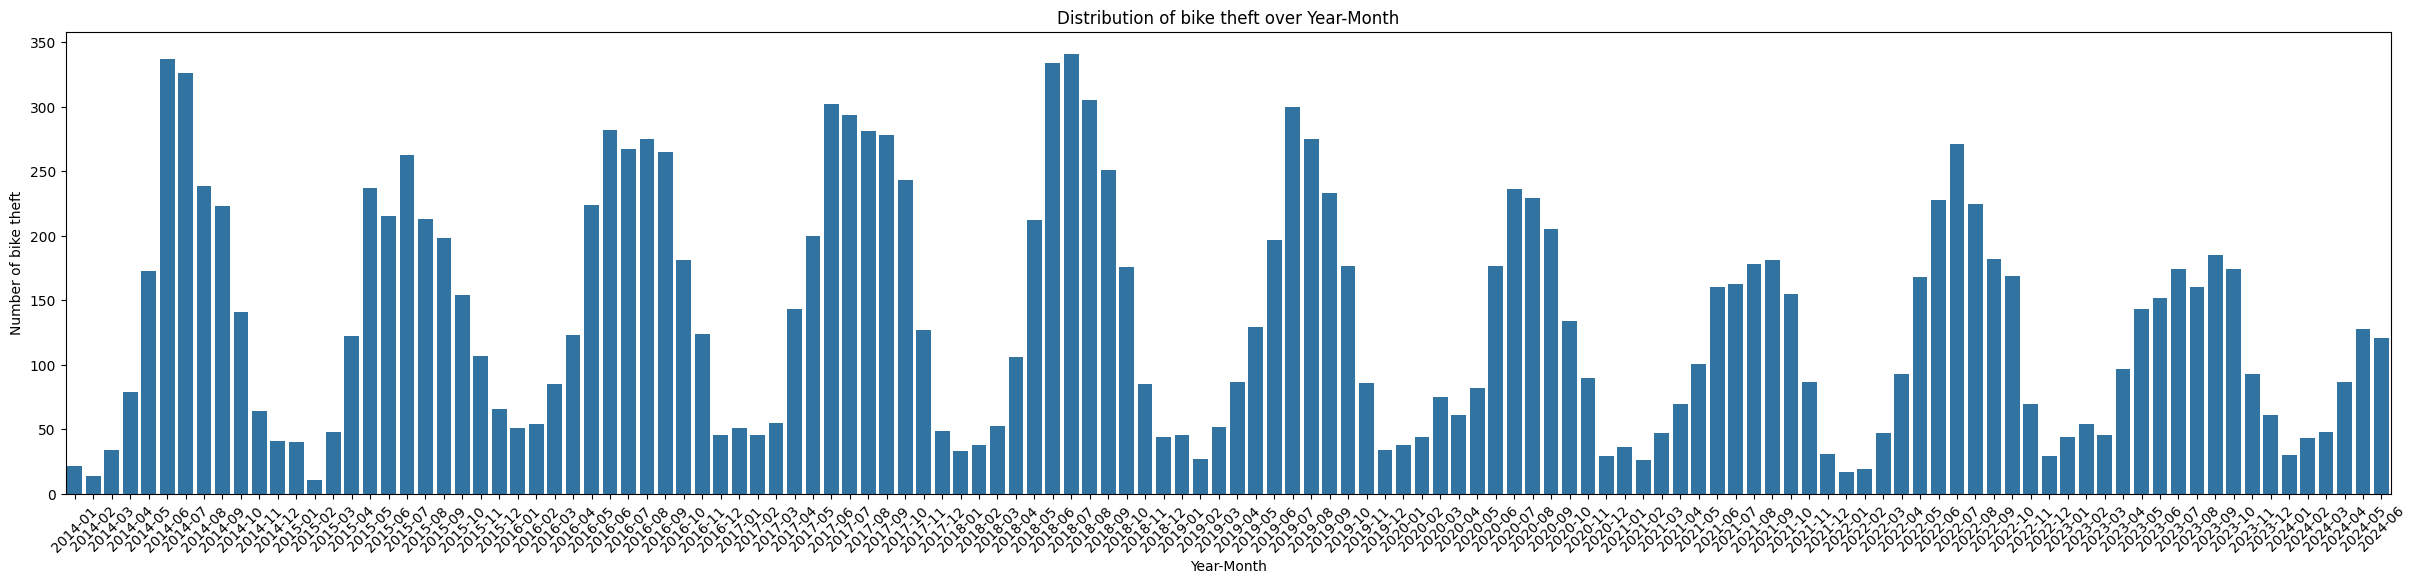

In [37]:
bike['year_month'] = bike['OCC_DATE'].dt.to_period('M')  # Creates 'YYYY-MM' format


plt.figure(figsize=(30, 6))
sns.countplot(data=bike, x='year_month')

plt.xlabel("Year-Month")
plt.ylabel("Number of bike theft")
plt.title("Distribution of bike theft over Year-Month")
plt.xticks(rotation=45)
plt.show()


In [38]:
#If we want to use this column - merge the UNKNOWN, other etc...
bike['BIKE_MAKE'].value_counts().head(50)

,count
BIKE_MAKE,
OT,3441
UK,1854
OTHER,1117
GI,935
TR,867
NO,519
CC,420
UNKNOWN MAKE,397
SU,382


In [39]:
bike = gpd.sjoin(bike, Neighbourhoods, how="left", predicate="within")
bike

,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,geometry,year_month,index_right,_id,neighbourhood_id,neighbourhood_name,CLASSIFICATION,CLASSIFICATION_CODE,neighborhood_area,park_area,park_density,park_count
18,GO-20141305317,THEFT UNDER,2014-01-05,2014.00,January,Sunday,5.00,5.00,23.00,D51,Bar / Restaurant,Commercial,VELOTEQ,SHOGT,EL,23.00,BLK,1800.00,STOLEN,MULTIPOINT (7224936.277 929729.192),2014-01,37.00,38.00,168,Downtown Yonge East,Not an NIA or Emerging Neighbourhood,NA,848427.42,28301.81,3.34,10.00
22,GO-20141318032,THEFT UNDER,2014-01-10,2014.00,January,Friday,10.00,10.00,6.00,D52,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,SUPERCYCLE,None,OT,24.00,GRY,400.00,STOLEN,MULTIPOINT (7225260.85 927436.371),2014-01,40.00,41.00,165,Harbourfront-CityPlace,Not an NIA or Emerging Neighbourhood,NA,1194692.33,186947.26,15.65,25.00
23,GO-20141318595,THEFT UNDER,2014-01-10,2014.00,January,Friday,10.00,10.00,9.00,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,EMMO,URBAN EN122687,SC,0.00,BLK,800.00,STOLEN,MULTIPOINT (7223819.787 928064.446),2014-01,80.00,81.00,078,Kensington-Chinatown,Not an NIA or Emerging Neighbourhood,NA,1610389.49,59567.09,3.70,10.00
30,GO-20149000445,THEFT UNDER,2014-01-14,2014.00,January,Tuesday,14.00,14.00,10.00,D52,Other Commercial / Corporate Places (For Profi...,Commercial,UK,None,RG,10.00,ONG,2000.00,STOLEN,MULTIPOINT (7224948.377 928385.873),2014-01,4.00,5.00,170,Yonge-Bay Corridor,Not an NIA or Emerging Neighbourhood,NA,1173955.57,19191.37,1.63,3.00
31,GO-20149000428,THEFT UNDER,2014-01-14,2014.00,January,Tuesday,14.00,14.00,8.00,D22,Schools During Supervised Activity,Educational,OT,None,RG,3.00,BLU,600.00,STOLEN,MULTIPOINT (7215101.391 920370.926),2014-01,138.00,139.00,018,New Toronto,Not an NIA or Emerging Neighbourhood,NA,3657838.31,685748.27,18.75,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36119,GO-20249033961,THEFT UNDER - BICYCLE,2024-06-30,2024.00,June,Sunday,30.00,182.00,4.00,D14,Bar / Restaurant,Commercial,OT,None,EL,40.00,BLK,4000.00,STOLEN,MULTIPOINT (7221590.73 928197.33),2024-06,105.00,106.00,081,Trinity-Bellwoods,Not an NIA or Emerging Neighbourhood,NA,1815085.68,188258.20,10.37,8.00
36120,GO-20249033957,THEFT UNDER,2024-06-29,2024.00,June,Saturday,29.00,181.00,21.00,D11,Ttc Subway Station,Transit,CA,BAD BOY,MT,7.00,None,2000.00,STOLEN,MULTIPOINT (7218577.64 927820.859),2024-06,99.00,100.00,088,High Park North,Not an NIA or Emerging Neighbourhood,NA,1975177.41,54563.04,2.76,7.00
36121,GO-20249034009,THEFT UNDER - BICYCLE,2024-06-30,2024.00,June,Sunday,30.00,182.00,10.00,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,OT,None,RG,0.00,GRY,400.00,STOLEN,MULTIPOINT (7221545.853 929188.792),2024-06,78.00,79.00,080,Palmerston-Little Italy,Not an NIA or Emerging Neighbourhood,NA,1506045.82,41923.68,2.78,4.00
36123,GO-20249034095,THEFT UNDER,2024-06-30,2024.00,June,Sunday,30.00,182.00,12.00,D51,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,OT,MAX G2,SC,30.00,BLK,1500.00,STOLEN,MULTIPOINT (7225319.324 928581.179),2024-06,37.00,38.00,168,Downtown Yonge East,Not an NIA or Emerging Neighbourhood,NA,848427.42,28301.81,3.34,10.00


In [41]:
bike_df = pd.DataFrame(bike)
bike_df.to_csv(f'{path}/bike_with_neighborhood.csv')

## Bike park analysis

Calculate park distance for each bike theft incident


In [ ]:
bike = update_df_with_park_data(bike)

bike['closest_park_distance'].describe()

,closest_park_distance
count,17027.00
mean,154.94
std,118.12
min,0.00
25%,69.00
50%,131.07
75%,218.75
max,1154.73


In [ ]:
bike.closest_park_category.value_counts()

,count
closest_park_category,
Near Park,8667
Distant,4939
In Park,3421


In [ ]:
bike.to_file(f"{path}/bike_with_n_and_p.json", driver="GeoJSON")


## Car Park analysis

Calculate park distance for each car theft incident


In [ ]:
car = update_df_with_park_data(car)

car['closest_park_distance'].describe()

,closest_park_distance
count,57188.00
mean,201.71
std,189.75
min,0.00
25%,78.58
50%,153.86
75%,263.45
max,1552.80


In [ ]:
car['closest_park_category'].value_counts()

,count
closest_park_category,
Near Park,25986
Distant,21539
In Park,9663


In [ ]:
car['closest_park_type'].value_counts()

,count
closest_park_type,
Parkette,18356
Neighbourhood,16774
Open Space,6852
District,5905
City-wide,4678
Community,4623


In [ ]:
car[car['closest_park_category']=='In Park']['closest_park_type'].value_counts()

,count
closest_park_type,
Parkette,2647
Neighbourhood,2425
City-wide,1328
District,1285
Open Space,1027
Community,951


In [ ]:
car.to_file(f"{path}/car_with_n_and_p.json", driver="GeoJSON")

